Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.13 loss: 230.259
0: ********* epoch 1 ********* test accuracy:0.098 test loss: 230.26
10: accuracy:0.6 loss: 115.933
20: accuracy:0.83 loss: 61.2917
30: accuracy:0.81 loss: 63.7258
40: accuracy:0.88 loss: 45.9763
50: accuracy:0.88 loss: 46.4928
50: ********* epoch 1 ********* test accuracy:0.8728 test loss: 46.7755
60: accuracy:0.95 loss: 28.2206
70: accuracy:0.86 loss: 53.9742
80: accuracy:0.89 loss: 31.6543
90: accuracy:0.92 loss: 31.7568
100: accuracy:0.91 loss: 38.8968
100: ********* epoch 1 ********* test accuracy:0.8812 test loss: 41.3588
110: accuracy:0.93 loss: 26.7649
120: accuracy:0.88 loss: 36.2421
130: accuracy:0.76 loss: 69.8536
140: accuracy:0.85 loss: 46.7728
150: accuracy:0.95 loss: 25.0937
150: ********* epoch 1 ********* test accuracy:0.8992 test loss: 35.9475
160: accuracy:0.86 loss: 45

1690: accuracy:0.93 loss: 37.2104
1700: accuracy:0.93 loss: 27.433
1700: ********* epoch 3 ********* test accuracy:0.9215 test loss: 27.9156
1710: accuracy:0.89 loss: 29.526
1720: accuracy:0.91 loss: 25.4939
1730: accuracy:0.92 loss: 28.0237
1740: accuracy:0.91 loss: 30.1468
1750: accuracy:0.92 loss: 31.7932
1750: ********* epoch 3 ********* test accuracy:0.9201 test loss: 28.3449
1760: accuracy:0.91 loss: 42.6766
1770: accuracy:0.95 loss: 21.4836
1780: accuracy:0.92 loss: 34.7131
1790: accuracy:0.88 loss: 50.3814
1800: accuracy:0.95 loss: 20.451
1800: ********* epoch 4 ********* test accuracy:0.9217 test loss: 28.164
1810: accuracy:0.91 loss: 23.4433
1820: accuracy:0.92 loss: 41.2669
1830: accuracy:0.93 loss: 26.1062
1840: accuracy:0.91 loss: 44.985
1850: accuracy:0.91 loss: 27.3887
1850: ********* epoch 4 ********* test accuracy:0.9203 test loss: 28.239
1860: accuracy:0.95 loss: 16.6122
1870: accuracy:0.89 loss: 39.6527
1880: accuracy:0.94 loss: 24.2765
1890: accuracy:0.97 loss: 13.5

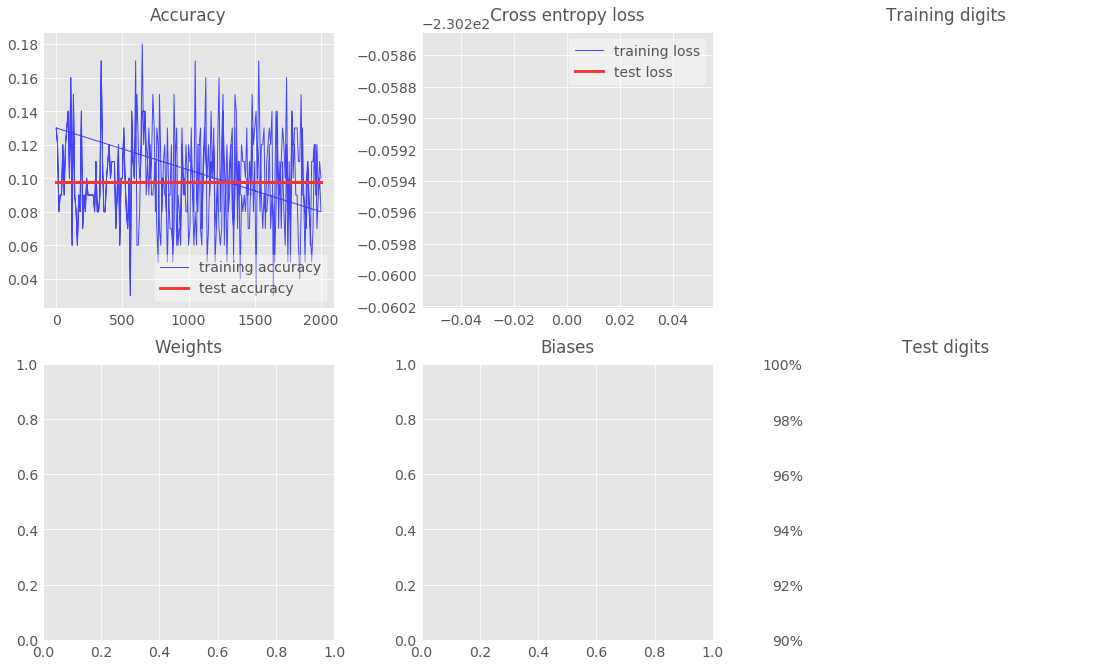

In [56]:
import tensorflow as tf
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

#Neural Network with one layer and 10 softmax neurons
#The model is Y = Softmax( X * W + b)
#Where X = [Batch, 784] 28*28 = 784 pixels. It will be a batch of 100 images of 28X28 pixel , flattened
# W = weight matrix with 784 lines and 10 columns
#b = Bias with 10 dimentions
#+ = Add with Broadcasting: add a vector on each line of the matrix(numpy)
#Y = output matrix with 100 lines and 10 columns
#softmax(matrix) applies softmax on each line
#softmax(line) applies an exp to each value then divides by the norm of the resulting line

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
b = tf.Variable(tf.zeros([10])) #10 bias for 10 images
Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

#The model
Y = tf.nn.softmax(tf.matmul(XX,W) + b)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = -tf.reduce_mean(Y_ * tf.log(Y)) * 1000.0 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)


#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.reshape(W, [-1])
allbiases = tf.reshape(b, [-1])
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)# assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_, 1000, lines = 25)# 1000 images by 25 lines
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(2000+1): training_step(i, i % 50 == 0, i % 10 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

## Adding more layers to increase accuracy? Will it work?

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.14 loss: 238.272
0: ********* epoch 1 ********* test accuracy:0.1155 test loss: 244.705
50: ********* epoch 1 ********* test accuracy:0.8718 test loss: 50.8108
100: accuracy:0.88 loss: 38.5244
100: ********* epoch 1 ********* test accuracy:0.8973 test loss: 39.3888
150: ********* epoch 1 ********* test accuracy:0.9038 test loss: 33.6095
200: accuracy:0.87 loss: 41.7679
200: ********* epoch 1 ********* test accuracy:0.9118 test loss: 29.9539
250: ********* epoch 1 ********* test accuracy:0.9217 test loss: 27.6116
300: accuracy:0.88 loss: 32.3746
300: ********* epoch 1 ********* test accuracy:0.9203 test loss: 26.819
350: ********* epoch 1 ********* test accuracy:0.9303 test loss: 24.343
400: accuracy:0.93 loss: 22.9326
400: ********* epoch 1 ********* test accuracy:0.9275 test loss: 24.6266
450: ********* 

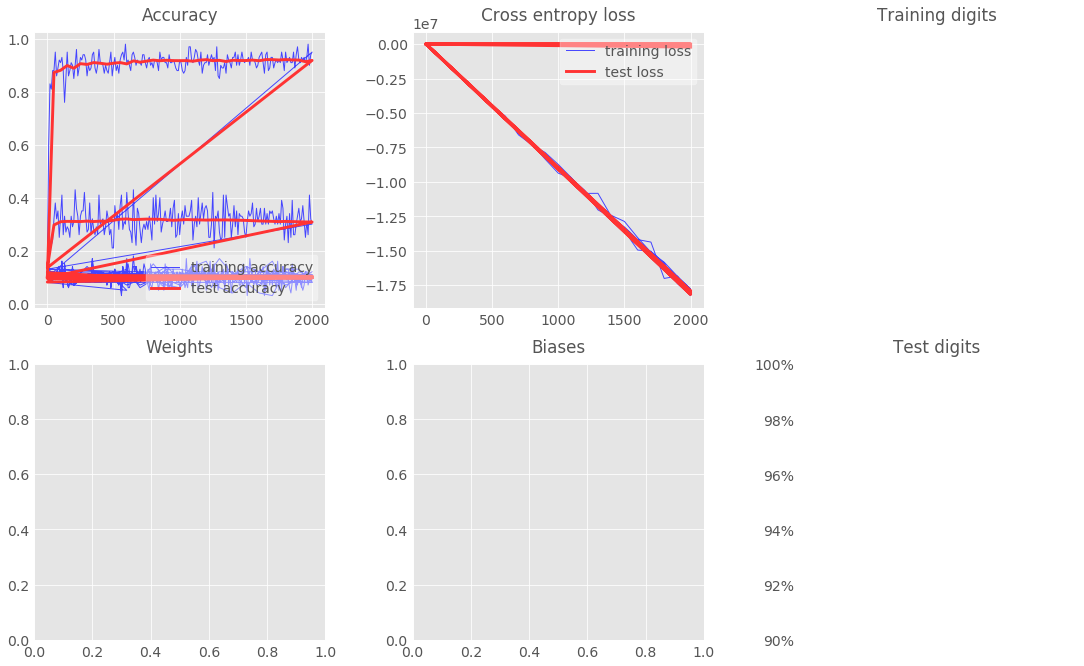

In [64]:
import tensorflow as tf
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

#Neural Network with one layer and 10 softmax neurons
#The model is Y = Softmax( X * W + b)
#Where X = [Batch, 784] 28*28 = 784 pixels. It will be a batch of 100 images of 28X28 pixel , flattened
# W = weight matrix with 784 lines and 10 columns
#b = Bias with 10 dimentions
#+ = Add with Broadcasting: add a vector on each line of the matrix(numpy)
#Y = output matrix with 100 lines and 10 columns
#softmax(matrix) applies softmax on each line
#softmax(line) applies an exp to each value then divides by the norm of the resulting line

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
#W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
#b = tf.Variable(tf.zeros([10])) #10 bias for 10 images

####
#To add a layer, you need an additional weights matrix and an additional bias vector for the intermediate layer
#The shape of the weights matrix for a layer is [N, M] where N is the number of inputs and M of outputs for the layer. 
#In the code above, we use 200 neurons in the intermediate layer and still 10 neurons in the last layer.
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([28*28,200], stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))

Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 28*28])

#The model
Y1 = tf.nn.sigmoid(tf.matmul(XX,W1) + b1)
YLogits = tf.matmul(Y1,W2) + b2
Y = tf.nn.softmax(YLogits)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=YLogits, labels = Y_)
cross_entropy = tf.reduce_mean(cross_entropy) * 100 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.concat([tf.reshape(W1, [-1]) ,tf.reshape(W2, [-1])],0)
allbiases = tf.concat([tf.reshape(b1, [-1]), tf.reshape(b2, [-1])],0)
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)# assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_, 1000, lines = 25)# 1000 images by 25 lines
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(2000+1): training_step(i, i % 50 == 0, i % 100 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

### Hurray 97%, Lets focus on doing 
#### Lets Try RELU instead of Sigmoid

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.11 loss: 255.328
0: ********* epoch 1 ********* test accuracy:0.102 test loss: 259.759
50: ********* epoch 1 ********* test accuracy:0.8918 test loss: 36.1607
100: accuracy:0.93 loss: 33.2941
100: ********* epoch 1 ********* test accuracy:0.9064 test loss: 31.4666
150: ********* epoch 1 ********* test accuracy:0.9198 test loss: 25.468
200: accuracy:0.92 loss: 27.7558
200: ********* epoch 1 ********* test accuracy:0.9397 test loss: 19.6887
250: ********* epoch 1 ********* test accuracy:0.9449 test loss: 18.4509
300: accuracy:0.95 loss: 22.4149
300: ********* epoch 1 ********* test accuracy:0.9463 test loss: 17.7999
350: ********* epoch 1 ********* test accuracy:0.9529 test loss: 15.3206
400: accuracy:0.96 loss: 10.8744
400: ********* epoch 1 ********* test accuracy:0.9478 test loss: 17.0082
450: ********* 

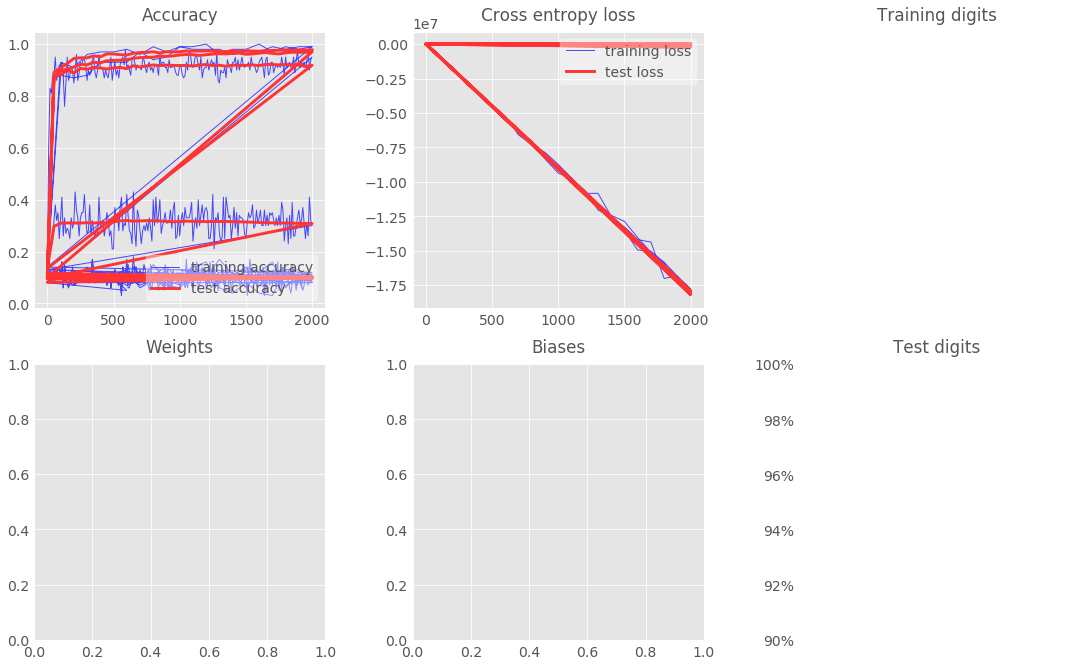

In [67]:
import tensorflow as tf
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

#Neural Network with one layer and 10 softmax neurons
#The model is Y = Softmax( X * W + b)
#Where X = [Batch, 784] 28*28 = 784 pixels. It will be a batch of 100 images of 28X28 pixel , flattened
# W = weight matrix with 784 lines and 10 columns
#b = Bias with 10 dimentions
#+ = Add with Broadcasting: add a vector on each line of the matrix(numpy)
#Y = output matrix with 100 lines and 10 columns
#softmax(matrix) applies softmax on each line
#softmax(line) applies an exp to each value then divides by the norm of the resulting line

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
#W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
#b = tf.Variable(tf.zeros([10])) #10 bias for 10 images

####
#To add a layer, you need an additional weights matrix and an additional bias vector for the intermediate layer
#The shape of the weights matrix for a layer is [N, M] where N is the number of inputs and M of outputs for the layer. 
#In the code above, we use 200 neurons in the intermediate layer and still 10 neurons in the last layer.
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([28*28,200], stddev=0.1))
b1 = tf.Variable(tf.ones([200])/10)
W2 = tf.Variable(tf.truncated_normal([200,10], stddev=0.1))
b2 = tf.Variable(tf.ones([10])/10)

Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 28*28])

#The model
Y1 = tf.nn.relu(tf.matmul(XX,W1) + b1)
YLogits = tf.matmul(Y1,W2) + b2
Y = tf.nn.softmax(YLogits)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=YLogits, labels = Y_)
cross_entropy = tf.reduce_mean(cross_entropy) * 100 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.concat([tf.reshape(W1, [-1]) ,tf.reshape(W2, [-1])],0)
allbiases = tf.concat([tf.reshape(b1, [-1]), tf.reshape(b2, [-1])],0)
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)# assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_, 1000, lines = 25)# 1000 images by 25 lines
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(2000+1): training_step(i, i % 50 == 0, i % 100 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

#### 97.65% accuracy. Can it get better?
### Lets try Decay learning rate

Please add learning rate decay to your code. In order to pass a different learning rate to the AdamOptimizer at each iteration, you will need to define a new placeholder and feed it a new value at each iteration through feed_dict.

Here is the formula for exponential decay: lr = lrmin+(lrmax-lrmin)*exp(-i/2000)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.07 loss: 271.139
0: ********* epoch 1 ********* test accuracy:0.0824 test loss: 261.513
100: accuracy:0.92 loss: 30.6267
200: accuracy:0.91 loss: 34.2778
300: accuracy:0.94 loss: 22.0146
400: accuracy:0.96 loss: 11.2497
500: accuracy:0.98 loss: 12.9312
500: ********* epoch 1 ********* test accuracy:0.9597 test loss: 13.2631
600: accuracy:0.98 loss: 8.9603
700: accuracy:0.94 loss: 12.5823
800: accuracy:0.97 loss: 8.42849
900: accuracy:0.98 loss: 5.70458
1000: accuracy:0.97 loss: 11.1377
1000: ********* epoch 2 ********* test accuracy:0.9696 test loss: 9.72564
1100: accuracy:0.99 loss: 3.74126
1200: accuracy:1.0 loss: 3.43448
1300: accuracy:0.99 loss: 3.53029
1400: accuracy:1.0 loss: 2.2127
1500: accuracy:1.0 loss: 2.48874
1500: ********* epoch 3 ********* test accuracy:0.9742 test loss: 8.46117
1600: accur

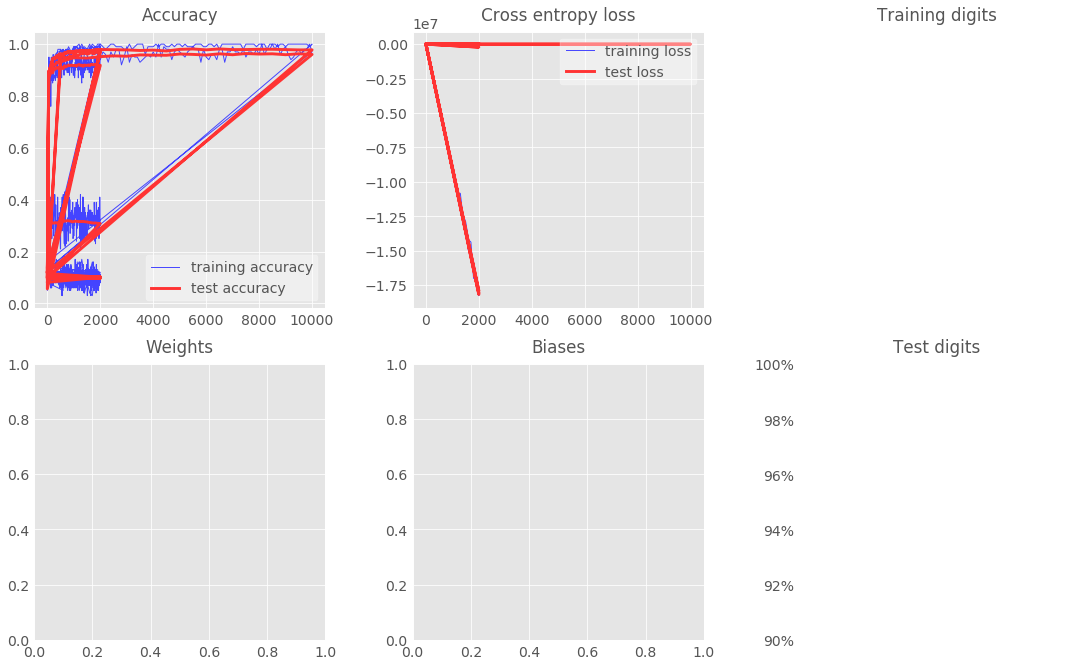

In [75]:
import tensorflow as tf
import math #for decay learning rate
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

#Neural Network with one layer and 10 softmax neurons
#The model is Y = Softmax( X * W + b)
#Where X = [Batch, 784] 28*28 = 784 pixels. It will be a batch of 100 images of 28X28 pixel , flattened
# W = weight matrix with 784 lines and 10 columns
#b = Bias with 10 dimentions
#+ = Add with Broadcasting: add a vector on each line of the matrix(numpy)
#Y = output matrix with 100 lines and 10 columns
#softmax(matrix) applies softmax on each line
#softmax(line) applies an exp to each value then divides by the norm of the resulting line

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
#W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
#b = tf.Variable(tf.zeros([10])) #10 bias for 10 images

####
#To add a layer, you need an additional weights matrix and an additional bias vector for the intermediate layer
#The shape of the weights matrix for a layer is [N, M] where N is the number of inputs and M of outputs for the layer. 
#In the code above, we use 200 neurons in the intermediate layer and still 10 neurons in the last layer.
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([28*28,200], stddev=0.1))
b1 = tf.Variable(tf.ones([200])/10)
W2 = tf.Variable(tf.truncated_normal([200,10], stddev=0.1))
b2 = tf.Variable(tf.ones([10])/10)
lr = tf.placeholder(tf.float32)

Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 28*28])

#The model
Y1 = tf.nn.relu(tf.matmul(XX,W1) + b1)
YLogits = tf.matmul(Y1,W2) + b2
Y = tf.nn.softmax(YLogits)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=YLogits, labels = Y_)
cross_entropy = tf.reduce_mean(cross_entropy) * 100 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
#learning_rate = 0.003
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.concat([tf.reshape(W1, [-1]) ,tf.reshape(W2, [-1])],0)
allbiases = tf.concat([tf.reshape(b1, [-1]), tf.reshape(b2, [-1])],0)
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)# assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_, 1000, lines = 25)# 1000 images by 25 lines
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    #Decaying learning rate
    Max_learning_rate = 0.003
    Min_learning_rate = 0.00001
    decay_speed = 10000
    learning_rate = Min_learning_rate + (Max_learning_rate - Min_learning_rate) * math.exp(-i/decay_speed)
    
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr: learning_rate})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(10000+1): training_step(i, i % 500 == 0, i % 100 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

### @10000 iteration, and decaying learning rate we are able to achieve 98.3% using 2 hidden layers. 
#### Lets try Drop out to see if there is improvement

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.11 loss: 258.217
0: ********* epoch 1 ********* test accuracy:0.0968 test loss: 253.158
100: accuracy:0.93 loss: 28.8082
200: accuracy:0.88 loss: 34.9855
300: accuracy:0.9 loss: 23.8192
400: accuracy:0.95 loss: 16.4453
500: accuracy:0.98 loss: 11.1761
500: ********* epoch 1 ********* test accuracy:0.9604 test loss: 13.2782
600: accuracy:0.98 loss: 8.29979
700: accuracy:0.94 loss: 17.0257
800: accuracy:0.99 loss: 4.48465
900: accuracy:0.98 loss: 5.57611
1000: accuracy:0.99 loss: 5.74268
1000: ********* epoch 2 ********* test accuracy:0.9693 test loss: 9.72856
1100: accuracy:0.98 loss: 8.17873
1200: accuracy:0.98 loss: 5.72199
1300: accuracy:0.95 loss: 8.36178
1400: accuracy:0.99 loss: 3.44596
1500: accuracy:0.95 loss: 10.4028
1500: ********* epoch 3 ********* test accuracy:0.973 test loss: 8.18531
1600: ac

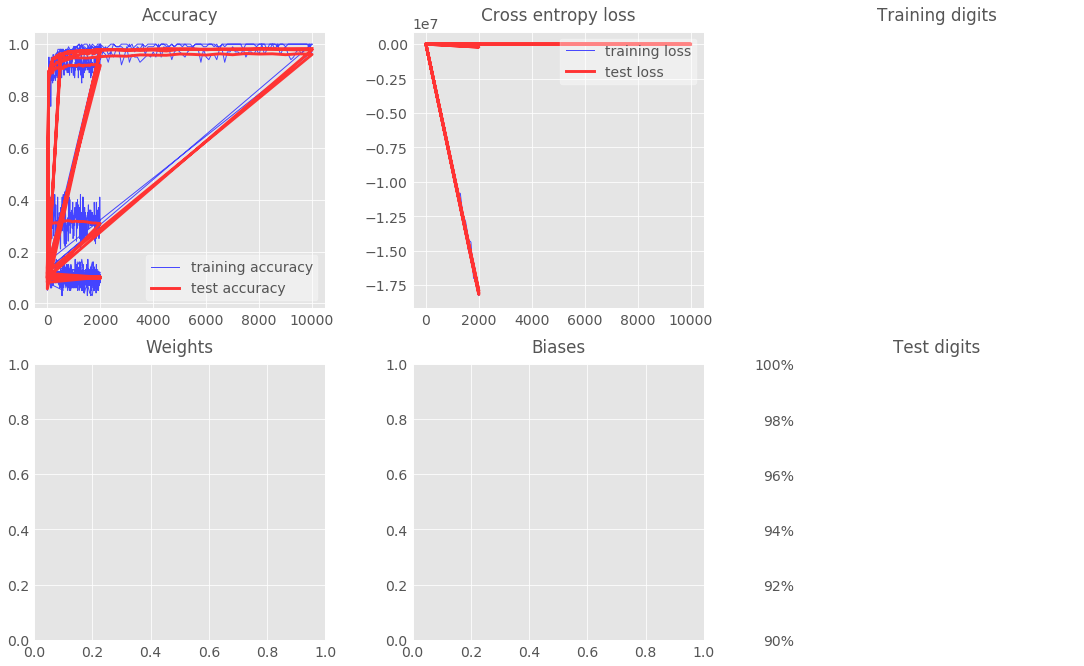

In [77]:
import tensorflow as tf
import math #for decay learning rate
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

#Neural Network with one layer and 10 softmax neurons
#The model is Y = Softmax( X * W + b)
#Where X = [Batch, 784] 28*28 = 784 pixels. It will be a batch of 100 images of 28X28 pixel , flattened
# W = weight matrix with 784 lines and 10 columns
#b = Bias with 10 dimentions
#+ = Add with Broadcasting: add a vector on each line of the matrix(numpy)
#Y = output matrix with 100 lines and 10 columns
#softmax(matrix) applies softmax on each line
#softmax(line) applies an exp to each value then divides by the norm of the resulting line

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
#W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
#b = tf.Variable(tf.zeros([10])) #10 bias for 10 images

####
#To add a layer, you need an additional weights matrix and an additional bias vector for the intermediate layer
#The shape of the weights matrix for a layer is [N, M] where N is the number of inputs and M of outputs for the layer. 
#In the code above, we use 200 neurons in the intermediate layer and still 10 neurons in the last layer.
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([28*28,200], stddev=0.1))
b1 = tf.Variable(tf.ones([200])/10)
W2 = tf.Variable(tf.truncated_normal([200,10], stddev=0.1))
b2 = tf.Variable(tf.ones([10])/10)
lr = tf.placeholder(tf.float32)
pkeep = tf.placeholder(tf.float32)

Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 28*28])

#The model
Y1 = tf.nn.relu(tf.matmul(XX,W1) + b1)
Y1D = tf.nn.dropout(Y1, pkeep)
YLogits = tf.matmul(Y1D,W2) + b2
Y = tf.nn.softmax(YLogits)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=YLogits, labels = Y_)
cross_entropy = tf.reduce_mean(cross_entropy) * 100 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
#learning_rate = 0.003
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.concat([tf.reshape(W1, [-1]) ,tf.reshape(W2, [-1])],0)
allbiases = tf.concat([tf.reshape(b1, [-1]), tf.reshape(b2, [-1])],0)
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)# assembles 10x10 images by default
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_, 1000, lines = 25)# 1000 images by 25 lines
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    #Decaying learning rate
    Max_learning_rate = 0.003
    Min_learning_rate = 0.00001
    decay_speed = 10000
    learning_rate = Min_learning_rate + (Max_learning_rate - Min_learning_rate) * math.exp(-i/decay_speed)
    
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 1.0})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, pkeep: 0.75, lr: learning_rate})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(10000+1): training_step(i, i % 500 == 0, i % 100 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

### Still 98.32% accuracy. May we should give CNN a try as it factors shapes too

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
0: accuracy:0.13 loss: 236.55
0: ********* epoch 1 ********* test accuracy:0.1027 test loss: 241.663
100: accuracy:0.97 loss: 23.0007
200: accuracy:0.94 loss: 16.9977
300: accuracy:0.94 loss: 17.7775
400: accuracy:0.97 loss: 7.03121
500: accuracy:0.99 loss: 3.36859
500: ********* epoch 1 ********* test accuracy:0.9759 test loss: 7.24045
600: accuracy:0.99 loss: 2.91986
700: accuracy:0.99 loss: 3.67229
800: accuracy:0.99 loss: 1.99558
900: accuracy:1.0 loss: 2.47042
1000: accuracy:0.99 loss: 3.05466
1000: ********* epoch 2 ********* test accuracy:0.9844 test loss: 4.65945
1100: accuracy:0.99 loss: 2.05214
1200: accuracy:1.0 loss: 0.670041
1300: accuracy:0.97 loss: 8.33606
1400: accuracy:0.98 loss: 6.72792
1500: accuracy:1.0 loss: 2.09938
1500: ********* epoch 3 ********* test accuracy:0.9863 test loss: 4.27982
1600: acc

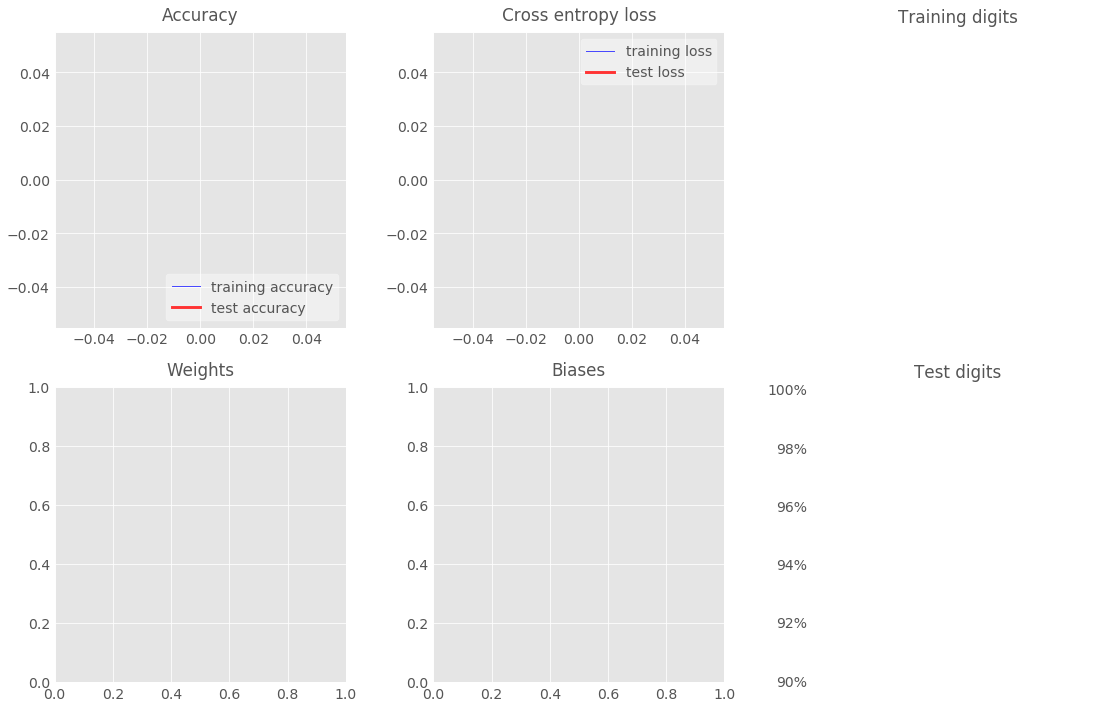

In [2]:
import tensorflow as tf
import math #for decay learning rate
%matplotlib inline 
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
tf.set_random_seed(0)
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

# neural network structure for this sample:
#
# · · · · · · · · · ·      (input data, 1-deep)                 X [batch, 28, 28, 1]
# @ @ @ @ @ @ @ @ @ @   -- conv. layer 6x6x1=>6 stride 1        W1 [5, 5, 1, 6]        B1 [6]
# ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                           Y1 [batch, 28, 28, 6]
#   @ @ @ @ @ @ @ @     -- conv. layer 5x5x6=>12 stride 2       W2 [5, 5, 6, 12]        B2 [12]
#   ∶∶∶∶∶∶∶∶∶∶∶∶∶∶∶                                             Y2 [batch, 14, 14, 12]
#     @ @ @ @ @ @       -- conv. layer 4x4x12=>24 stride 2      W3 [4, 4, 12, 24]       B3 [24]
#     ∶∶∶∶∶∶∶∶∶∶∶                                               Y3 [batch, 7, 7, 24] => reshaped to YY [batch, 7*7*24]
#      \x/x\x\x/ ✞      -- fully connected layer (relu+dropout) W4 [7*7*24, 200]       B4 [200]
#       · · · ·                                                 Y4 [batch, 200]
#       \x/x\x/         -- fully connected layer (softmax)      W5 [200, 10]           B5 [10]
#        · · ·                                                  Y [batch, 20]

X = tf.placeholder(tf.float32, [None, 28,28,1]) # 28 pixel X 28 pixel X 1 color channel(greyscale image)
#W = tf.Variable(tf.zeros([784,10])) # 28x28 = 784 , 10 images
#b = tf.Variable(tf.zeros([10])) #10 bias for 10 images

####
# three convolutional layers with their channel counts, and a
# fully connected layer (tha last layer has 10 softmax neurons)
K = 6  # first convolutional layer output depth
L = 12 # Second convolutional layer output depth
M = 24 # Third convolutional layer output depth
N = 200 # Fully connected layer

W1 = tf.Variable(tf.truncated_normal([6,6,1,K], stddev=0.1)) # 6x6 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
W2 = tf.Variable(tf.truncated_normal([5,5,K,L], stddev=0.1)) # 6x6 patch, 1 input channel, K output channels
B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
W3 = tf.Variable(tf.truncated_normal([4,4,L,M], stddev=0.1)) # 6x6 patch, 1 input channel, K output channels
B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))

#Fully connected
W4 = tf.Variable(tf.truncated_normal([7*7*M, N], stddev=0.1)) # 6x6 patch, 1 input channel, K output channels
B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.constant(0.1, tf.float32, [10]))

lr = tf.placeholder(tf.float32)
pkeep = tf.placeholder(tf.float32)

Y_ = tf.placeholder(tf.float32, [None, 10])
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 28*28])

#The model
stride = 1#Output 28X28 pixel
Y1 = tf.nn.relu(tf.nn.conv2d(X,W1,strides=[1,stride, stride,1], padding="SAME")+B1)
stride = 2#Output 14X14 pixel
Y2 = tf.nn.relu(tf.nn.conv2d(Y1,W2,strides=[1,stride, stride,1], padding="SAME")+B2)
stride = 2#Output 7X7 pixel
Y3 = tf.nn.relu(tf.nn.conv2d(Y2,W3,strides=[1,stride, stride,1], padding="SAME")+B3)

YY = tf.reshape(Y3, shape=[-1,7*7*M])


Y4 = tf.nn.relu(tf.matmul(YY,W4) + B4)
YY4 = tf.nn.dropout(Y4, pkeep)
YLogits = tf.matmul(YY4,W5) + B5
Y = tf.nn.softmax(YLogits)

# loss function: cross-entropy = - sum( Y_i * log(Yi) )
#                           Y: the computed output vector
#                           Y_: the desired output vector
# cross-entropy
# log takes the log of each element, * multiplies the tensors element by element
# reduce_mean will add all the components in the tensor
# so here we end up with the total cross-entropy for all images in the batch
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=YLogits, labels = Y_)
cross_entropy = tf.reduce_mean(cross_entropy) * 100 # normalized for batches of 100 images, *10 because  "mean" included an unwanted division by 10

#accuracy of trained model
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#training, learningrate = 0.005
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
#learning_rate = 0.003
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

#init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#Visualization
import tensorflowvisu

allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1]), tf.reshape(B5, [-1])], 0)
I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)
It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)
datavis = tensorflowvisu.MnistDataVis()

#Traing 100 images at the time
def training_step(i, update_test_data, update_train_data):
    
    #training on batches of 100 images and labels at a time
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    #Decaying learning rate
    Max_learning_rate = 0.003
    Min_learning_rate = 0.00001
    decay_speed = 10000
    learning_rate = Min_learning_rate + (Max_learning_rate - Min_learning_rate) * math.exp(-i/decay_speed)
    
    
    # compute training values for visualisation
    if update_train_data:
        a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 1.0})
        datavis.append_training_curves_data(i, a, c)
        datavis.append_data_histograms(i, w, b)
        datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        datavis.append_test_curves_data(i, a, c)
        datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))
        
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, pkeep: 0.75, lr: learning_rate})
#datavis.animate(training_step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
for i in range(10000+1): training_step(i, i % 500 == 0, i % 100 == 0)
print("max test accuracy: " + str(datavis.get_max_test_accuracy()))

### Hurray! 99.06% accuracy